In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('/content/augmentedDataWithoutStemming.csv')

In [ ]:
df

,Unnamed: 0,Unnamed: 0.1,Name,Genres,Summary
0,0,1,A Clockwork Orange,Science Fiction,alex teenager living near future england lead...
1,1,6,A Wizard of Earthsea,Children's literature,ged young boy gont one larger islands north a...
2,2,8,Blade Runner 3: Replicant Night,Science Fiction,living mars deckard acting consultant movie c...
3,3,9,Blade Runner 2: The Edge of Human,Science Fiction,beginning several months events blade runner ...
4,4,21,Children of Dune,Science Fiction,nine years emperor paul muad dib walked deser...
...,...,...,...,...,...
21864,21864,16414,Carver,Thriller,central character samuel carver ex assassin s...
21865,21865,16442,Rabies,Thriller,seth betimes 1980s height insensate war novel...
21866,21866,16542,The Bourne Imperative,Thriller,detailed background main character see jason ...
21867,21867,16551,Remote Control,Thriller,series follows character nick stone ex milita...


In [ ]:
XS=df.Summary
XN=df.Name
XNS=df[['Name', 'Summary']]
Y=df.Genres.values
XS.shape, XN.shape, XNS.shape, Y.shape

((21869,), (21869,), (21869, 2), (21869,))

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import classification_report

In [ ]:
XS_train, XS_test, YS_train, YS_test = train_test_split(XS, Y, test_size=0.3, random_state = 42)
XN_train, XN_test, YN_train, YN_test = train_test_split(XN, Y, test_size=0.3, random_state = 42)
XNS_train, XNS_test, YNS_train, YNS_test = train_test_split(XNS, Y, test_size=0.3, random_state = 42)

# SGD Classfier:

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd = Pipeline([('vect', CountVectorizer(ngram_range=(1,3))),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])

In [ ]:
sgd.fit(XS_train, YS_train)

Pipeline(steps=[('vect', CountVectorizer(ngram_range=(1, 3))),
                ('tfidf', TfidfTransformer()),
                ('clf',
                 SGDClassifier(alpha=0.001, max_iter=5, random_state=42,
                               tol=None))])

In [ ]:
YS_pred = sgd.predict(XS_test)

In [ ]:
print('accuracy %s' % accuracy_score(YS_pred, YS_test))
print(classification_report(YS_test, YS_pred))

accuracy 0.8425544886450236
                        precision    recall  f1-score   support

       Adventure novel       0.95      1.00      0.97       211
             Biography       0.89      1.00      0.94       112
 Children's literature       0.69      0.53      0.60       330
               Fantasy       0.84      0.84      0.84       361
                Horror       0.92      1.00      0.96       299
      Literary fiction       0.98      1.00      0.99        85
                Memoir       0.95      1.00      0.97       145
               Mystery       0.79      0.87      0.83       452
           Non-fiction       0.90      1.00      0.95       466
                 Novel       0.58      0.09      0.16       296
            Philosophy       0.91      0.99      0.95        74
          Picture book       0.96      0.97      0.97       162
         Romance novel       0.89      1.00      0.94       213
       Science Fiction       0.77      0.75      0.76       283
           

In [ ]:
SGDsummary = accuracy_score(YS_pred, YS_test)
SGDsummary

0.8425544886450236

In [ ]:
sgd.fit(XN_train, YN_train)

Pipeline(steps=[('vect', CountVectorizer(ngram_range=(1, 3))),
                ('tfidf', TfidfTransformer()),
                ('clf',
                 SGDClassifier(alpha=0.001, max_iter=5, random_state=42,
                               tol=None))])

In [ ]:
YN_pred = sgd.predict(XN_test)

In [ ]:
print('accuracy %s' % accuracy_score(YN_pred, YN_test))
print(classification_report(YN_test, YN_pred))

accuracy 0.7215363511659808
                        precision    recall  f1-score   support

       Adventure novel       0.79      1.00      0.88       211
             Biography       0.78      1.00      0.88       112
 Children's literature       0.40      0.10      0.16       330
               Fantasy       0.77      0.71      0.74       361
                Horror       0.79      0.99      0.88       299
      Literary fiction       0.74      1.00      0.85        85
                Memoir       0.83      1.00      0.91       145
               Mystery       0.73      0.77      0.75       452
           Non-fiction       0.71      1.00      0.83       466
                 Novel       0.20      0.03      0.05       296
            Philosophy       0.82      1.00      0.90        74
          Picture book       0.76      1.00      0.86       162
         Romance novel       0.80      1.00      0.89       213
       Science Fiction       0.49      0.15      0.23       283
           

In [ ]:
SGDname = accuracy_score(YN_pred, YN_test)
SGDname

0.7215363511659808

In [ ]:
combined = XNS_train["Name"] + ' ' + XNS_train["Summary"]

In [ ]:
sgd.fit(combined, YNS_train)

Pipeline(steps=[('vect', CountVectorizer(ngram_range=(1, 3))),
                ('tfidf', TfidfTransformer()),
                ('clf',
                 SGDClassifier(alpha=0.001, max_iter=5, random_state=42,
                               tol=None))])

In [ ]:
combined_test = XNS_test["Name"] + ' ' + XNS_test["Summary"]

In [ ]:
YNS_pred = sgd.predict(combined_test)

In [ ]:
print('accuracy %s' % accuracy_score(YNS_pred, YNS_test))
print(classification_report(YNS_test, YNS_pred))

accuracy 0.8404206675811614
                        precision    recall  f1-score   support

       Adventure novel       0.94      1.00      0.97       211
             Biography       0.87      1.00      0.93       112
 Children's literature       0.67      0.52      0.58       330
               Fantasy       0.83      0.84      0.83       361
                Horror       0.91      1.00      0.95       299
      Literary fiction       0.98      1.00      0.99        85
                Memoir       0.94      1.00      0.97       145
               Mystery       0.79      0.88      0.83       452
           Non-fiction       0.88      1.00      0.94       466
                 Novel       0.61      0.09      0.16       296
            Philosophy       0.91      0.99      0.95        74
          Picture book       0.95      0.97      0.96       162
         Romance novel       0.91      1.00      0.95       213
       Science Fiction       0.79      0.75      0.77       283
           

In [ ]:
SGDNS = accuracy_score(YNS_pred, YNS_test)
SGDNS

0.8404206675811614

# Linear SVC Classifier:

In [ ]:
from sklearn.svm import LinearSVC

linear_svc = Pipeline([('vect', CountVectorizer(ngram_range=(1,2))),
                ('tfidf', TfidfTransformer()),
                ('clf', LinearSVC(random_state=0, tol=1e-5)),
               ])

In [ ]:
linear_svc.fit(XS_train, YS_train)

Pipeline(steps=[('vect', CountVectorizer(ngram_range=(1, 2))),
                ('tfidf', TfidfTransformer()),
                ('clf', LinearSVC(random_state=0, tol=1e-05))])

In [ ]:
YS_pred = linear_svc.predict(XS_test)

In [ ]:
print('accuracy %s' % accuracy_score(YS_pred, YS_test))
print(classification_report(YS_test, YS_pred))

accuracy 0.8745618046029568
                        precision    recall  f1-score   support

       Adventure novel       0.98      1.00      0.99       211
             Biography       0.97      1.00      0.99       112
 Children's literature       0.68      0.66      0.67       330
               Fantasy       0.86      0.90      0.88       361
                Horror       0.99      1.00      0.99       299
      Literary fiction       0.99      1.00      0.99        85
                Memoir       0.99      1.00      0.99       145
               Mystery       0.87      0.90      0.88       452
           Non-fiction       0.96      1.00      0.98       466
                 Novel       0.48      0.21      0.30       296
            Philosophy       0.97      1.00      0.99        74
          Picture book       0.99      0.99      0.99       162
         Romance novel       0.99      1.00      0.99       213
       Science Fiction       0.83      0.77      0.80       283
           

In [ ]:
LSVCsummary = accuracy_score(YS_pred, YS_test)
LSVCsummary

0.8745618046029568

In [ ]:
linear_svc.fit(XN_train, YN_train)

Pipeline(steps=[('vect', CountVectorizer(ngram_range=(1, 2))),
                ('tfidf', TfidfTransformer()),
                ('clf', LinearSVC(random_state=0, tol=1e-05))])

In [ ]:
YN_pred = linear_svc.predict(XN_test)

In [ ]:
print('accuracy %s' % accuracy_score(YN_pred, YN_test))
print(classification_report(YN_test, YN_pred))

accuracy 0.7604023776863283
                        precision    recall  f1-score   support

       Adventure novel       0.94      1.00      0.97       211
             Biography       0.93      1.00      0.96       112
 Children's literature       0.33      0.20      0.25       330
               Fantasy       0.70      0.77      0.74       361
                Horror       0.93      0.99      0.96       299
      Literary fiction       0.87      1.00      0.93        85
                Memoir       0.94      1.00      0.97       145
               Mystery       0.70      0.80      0.75       452
           Non-fiction       0.91      1.00      0.95       466
                 Novel       0.23      0.07      0.11       296
            Philosophy       0.94      1.00      0.97        74
          Picture book       0.92      1.00      0.96       162
         Romance novel       0.93      1.00      0.96       213
       Science Fiction       0.38      0.19      0.25       283
           

In [ ]:
LSVCname = accuracy_score(YN_pred, YN_test)
LSVCname

0.7604023776863283

In [ ]:
linear_svc.fit(combined, YNS_train)

Pipeline(steps=[('vect', CountVectorizer(ngram_range=(1, 2))),
                ('tfidf', TfidfTransformer()),
                ('clf', LinearSVC(random_state=0, tol=1e-05))])

In [ ]:
YNS_pred = linear_svc.predict(combined_test)

In [ ]:
print('accuracy %s' % accuracy_score(YNS_pred, YNS_test))
print(classification_report(YNS_test, YNS_pred))

accuracy 0.8737997256515775
                        precision    recall  f1-score   support

       Adventure novel       0.98      1.00      0.99       211
             Biography       0.98      1.00      0.99       112
 Children's literature       0.68      0.66      0.67       330
               Fantasy       0.85      0.89      0.87       361
                Horror       0.99      1.00      0.99       299
      Literary fiction       0.99      1.00      0.99        85
                Memoir       0.99      1.00      0.99       145
               Mystery       0.86      0.90      0.88       452
           Non-fiction       0.96      1.00      0.98       466
                 Novel       0.46      0.20      0.28       296
            Philosophy       0.99      1.00      0.99        74
          Picture book       0.99      1.00      1.00       162
         Romance novel       0.99      1.00      0.99       213
       Science Fiction       0.83      0.77      0.80       283
           

In [ ]:
LSVCNS = accuracy_score(YNS_pred, YNS_test)
LSVCNS

0.8737997256515775

# Comparison:

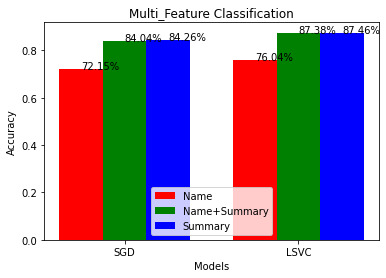

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

N = 3
ind = np.arange(2)
width = 0.25

xvals = [SGDname, LSVCname]
bar1 = plt.bar(ind, xvals, width, color = 'r')

yvals = [SGDNS, LSVCNS]
bar2 = plt.bar(ind+width, yvals, width, color='g')

zvals = [SGDsummary, LSVCsummary]
bar3 = plt.bar(ind+width*2, zvals, width, color = 'b')

plt.xlabel("Models")
plt.ylabel('Accuracy')
plt.title("Multi_Feature Classification")

plt.xticks(ind+width,['SGD', 'LSVC'])
plt.legend( (bar1, bar2, bar3), ('Name', 'Name+Summary', 'Summary') )
plt.annotate("{:.2%}".format(SGDname), (0, SGDname))
plt.annotate("{:.2%}".format(SGDNS), (0.25, SGDNS))
plt.annotate("{:.2%}".format(SGDsummary), (0.50, SGDsummary))
plt.annotate("{:.2%}".format(LSVCname), (1, LSVCname))
plt.annotate("{:.2%}".format(LSVCNS), (1.25, LSVCNS))
plt.annotate("{:.2%}".format(LSVCsummary), (1.50, LSVCsummary))
plt.show()
